# Homework Assignment 2: MatplotLib and NumPy

In this excersise we will review in depth the numpy and matplotlib packages. You should feel free to use these packages (plus any related pylab packages), but no other custom functions.

Homework Guidelines:

1) Document your code! Only part of your score on the homework will be if you get the "right" answer. In order for us to understand what you've written, you need to have clearly written code. Documenting your code with comments (# sign) and spacing out your code (but not too much) makes it easier to read. You should also make use of the markdown feature of ipython notebooks for longer explanations or to imbed pictures/formulas. 

2) You may google around for tools for solving the homework problems (StackExchange will often pop up!) but DO NOT google the exact problem statement or copy blocks of code from elsewhere.

3) You can work in small groups to complete assignments and share code within the small group. Please specify who you worked with if your submitted solutions are similar/identical.

4) Various python packages have built in routines for common programming tasks. If you want to use an external (i.e. import X) package which isn't imported in the problem statement please ask the instructor first.

5) Some problem statements might be vague or unspecific (like "Explore the relationship between X and Y"), just like real research questions! When in doubt it would be useful to provide plots and your observations. Show what you did graphically whenever possible.

6) Run all cells before you commit!

## Problem 1) Plot Layout Reproduction (10 Points)
Like an artist reproducing the works of the masters, it is a useful excersize to try and reproduce plots of others. Below are three plots which you are tasked to reproduce using matpotlib. Do not worry about colorschemes, font sizes, etc. most important is that it is pretty in the end.




### Thermal SZ Powerspectrum

![tSZ](./matplotlib/tSZ.png)


In [1]:
import numpy as np

n_temp = 7.45
l = np.load("./matplotlib/l.npy")
halo1 = np.load("./matplotlib/1halo.npy")
halo2 = np.load("./matplotlib/2halo.npy")
halot = np.load("./matplotlib/total.npy")
terr = np.load("./matplotlib/terr.npy")
data = np.load("./matplotlib/data.npy")

Populating the interactive namespace from numpy and matplotlib


ValueError: shape mismatch: objects cannot be broadcast to a single shape

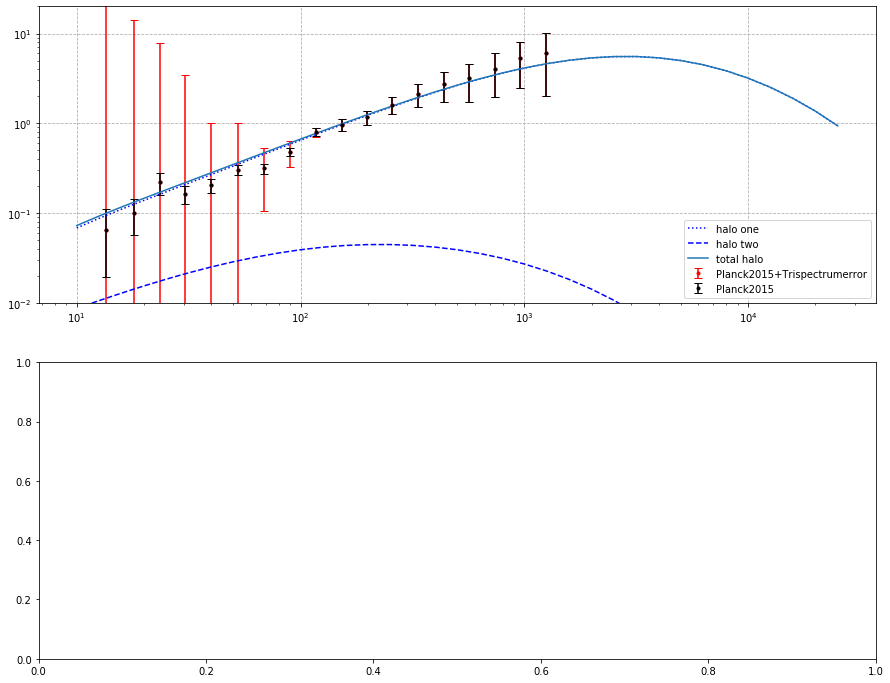

In [72]:
#My code:
import numpy as np

n_temp = 7.45
l = np.load("./matplotlib/l.npy")
halo1 = np.load("./matplotlib/1halo.npy")
halo2 = np.load("./matplotlib/2halo.npy")
halot = np.load("./matplotlib/total.npy")
terr = np.load("./matplotlib/terr.npy")
data = np.load("./matplotlib/data.npy")

%pylab inline
fig=plt.figure(figsize=(15,12))
fig.add_subplot(2,1,1)
plt.errorbar(data[1:,0], data[1:,1]*n_temp, color = "red",label="Planck2015+Trispectrumerror",yerr=np.sqrt(data[1:,2]**2+data[1:,3]**2+terr[1:]**2)*n_temp, fmt='.',capsize=4)
plt.errorbar(data[1:,0], data[1:,1]*n_temp, color = "black",label="Planck2015",yerr=np.sqrt(data[1:,2]**2+data[1:,3]**2)*n_temp, fmt='.',capsize=4)
plt.ylim((0.01,20))
plt.grid(linestyle="--")
plt.legend(loc='lower right')
pylab.loglog(l,halo1,"r:",label="halo one",color="blue")
pylab.loglog(l,halo2,"--",label="halo two",color="blue")
pylab.loglog(l,halot,label="total halo")
plt.legend(loc='lower right')

fig.add_subplot(2,1,2)
import scipy as sci
from scipy import interpolate
best_fit = sci.interpolate.interp1d(l,halot/n_temp)
best_fit_d = [best_fit(i) for i in data[:,0]]
ratio = np.array([(data[i,1])-best_fit_d[i] for i,_ in enumerate(best_fit_d)])
plt.errorbar(data[1:,0],ratio,color = "red", yerr=np.sqrt(data[1:,2]**2+data[1:,3]**2+terr[1:]**2)*n_temp, fmt='.',capsize=5)
plt.errorbar(data[1:,0],ratio ,color = "black", yerr=np.sqrt(data[1:,2]**2+data[1:,3]**2)*n_temp, fmt='.',alpha=0.75,capsize=5)
x=np.linspace(10,5000)
y=x*0
plt.xlim((10,5000))
plt.ylim((-2,2))
plt.plot(x,y,"black")
semilogx()
plt.xlabel("$l$",fontsize=20)
plt.ylabel("$Residual$",fontsize=20)
plt.grid(ls="--")
plt.subplots_adjust(wspace=0,hspace=0)





Populating the interactive namespace from numpy and matplotlib


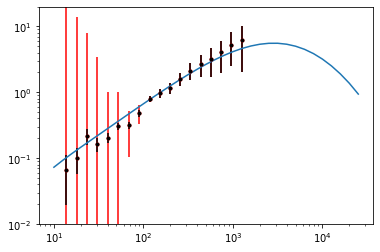

In [56]:
# Short example to help understand the things plotted

%pylab inline
plt.errorbar(data[1:,0], data[1:,1]*n_temp, color = "red", yerr=np.sqrt(data[1:,2]**2+data[1:,3]**2+terr[1:]**2)*n_temp, fmt='.')
plt.errorbar(data[1:,0], data[1:,1]*n_temp, color = "black", yerr=np.sqrt(data[1:,2]**2+data[1:,3]**2)*n_temp, fmt='.')
plt.ylim((0.01,20))
pylab.loglog(l,halot)


## Problem 2) Hubble Law Activity (15 Points)

Erwin Hubble famously used distances and velocities (inferred from the redshift) to discover that the universe was expanding. You can find his original paper here:http://apod.nasa.gov/diamond_jubilee/d_1996/hub_1929.html

Lets look at use data to repeat his analysis!

In [55]:
#Data format is alsways important to remember! Here it is [Galaxy ID Number , velocity (km./sec), distance away (megaparsecs)]
import numpy as np
from matplotlib import pyplot as plt
hubble_data = np.array([[  2.78000000e+02,   6.50000000e+02,   1.52000000e+00],
       [  5.84000000e+02,   1.80000000e+03,   3.45000000e+00],
       [  9.36000000e+02,   1.30000000e+03,   2.37000000e+00],
       [  1.02300000e+03,   3.00000000e+02,   6.20000000e-01],
       [  1.70000000e+03,   8.00000000e+02,   1.16000000e+00],
       [  2.68100000e+03,   7.00000000e+02,   1.42000000e+00],
       [  2.68300000e+03,   4.00000000e+02,   6.70000000e-01],
       [  2.84100000e+03,   6.00000000e+02,   1.24000000e+00],
       [  3.03400000e+03,   2.90000000e+02,   7.90000000e-01],
       [  3.11500000e+03,   6.00000000e+02,   1.00000000e+00],
       [  3.36800000e+03,   9.40000000e+02,   1.74000000e+00],
       [  3.37900000e+03,   8.10000000e+02,   1.49000000e+00],
       [  3.48900000e+03,   6.00000000e+02,   1.10000000e+00],
       [  3.52100000e+03,   7.30000000e+02,   1.27000000e+00],
       [  3.62300000e+03,   8.00000000e+02,   1.53000000e+00],
       [  4.11100000e+03,   8.00000000e+02,   1.79000000e+00],
       [  4.52600000e+03,   5.80000000e+02,   1.20000000e+00],
       [  4.56500000e+03,   1.10000000e+03,   2.35000000e+00],
       [  4.59400000e+03,   1.14000000e+03,   2.23000000e+00],
       [  5.00500000e+03,   9.00000000e+02,   2.06000000e+00],
       [  5.86600000e+03,   6.50000000e+02,   1.73000000e+00]])

1) Plot his data (remember to make it look nice!) and fit by eye a line ($y=mx$) to overplot.

0.001728476821192053


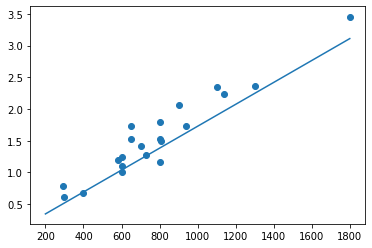

In [6]:
import numpy as np
from matplotlib import pyplot as plt
hubble_data = np.array([[  2.78000000e+02,   6.50000000e+02,   1.52000000e+00],
       [  5.84000000e+02,   1.80000000e+03,   3.45000000e+00],
       [  9.36000000e+02,   1.30000000e+03,   2.37000000e+00],
       [  1.02300000e+03,   3.00000000e+02,   6.20000000e-01],
       [  1.70000000e+03,   8.00000000e+02,   1.16000000e+00],
       [  2.68100000e+03,   7.00000000e+02,   1.42000000e+00],
       [  2.68300000e+03,   4.00000000e+02,   6.70000000e-01],
       [  2.84100000e+03,   6.00000000e+02,   1.24000000e+00],
       [  3.03400000e+03,   2.90000000e+02,   7.90000000e-01],
       [  3.11500000e+03,   6.00000000e+02,   1.00000000e+00],
       [  3.36800000e+03,   9.40000000e+02,   1.74000000e+00],
       [  3.37900000e+03,   8.10000000e+02,   1.49000000e+00],
       [  3.48900000e+03,   6.00000000e+02,   1.10000000e+00],
       [  3.52100000e+03,   7.30000000e+02,   1.27000000e+00],
       [  3.62300000e+03,   8.00000000e+02,   1.53000000e+00],
       [  4.11100000e+03,   8.00000000e+02,   1.79000000e+00],
       [  4.52600000e+03,   5.80000000e+02,   1.20000000e+00],
       [  4.56500000e+03,   1.10000000e+03,   2.35000000e+00],
       [  4.59400000e+03,   1.14000000e+03,   2.23000000e+00],
       [  5.00500000e+03,   9.00000000e+02,   2.06000000e+00],
       [  5.86600000e+03,   6.50000000e+02,   1.73000000e+00]])
x=hubble_data[:,1]
y=hubble_data[:,2]
a=np.linspace(200,1800,100)
m=(3.4-0.79)/(1800-290)
b=m*a
plt.scatter(x,y)
plt.plot(a,b)
print(m)

2) Write a function to give the chi-squared of the line for a given $m$. Recall that the chi-squared is...
$$ \chi^2 = \sum_{i} (\bar{n}_i - n_i)$$
where $\bar{n}_i$ is th theory prediction and $n_i$ is the data value. Here we assume all points have the same error.

In [9]:
n1=m*x
n2=y
c=n2-n1
sum(c)
print(sum(c))

4.227417218543047


3) Loop over values of $m$ to find the best slope. This slope is known as the Hubble constant.

In [28]:
m=np.linspace(0,5,10000)
j=[]
#find out the smallest chi-square
for i in range(0,10000):
    n1=m[i]*x
    n2=y
    c=n1-n2
    d=sum(c)
    if d>0:
        j.append(d)
    else:
        d=-d
        j.append(d)
min(j)
print("The smallest chi-square:"+str(min(j)))
#find out the "m" that makes the best fit.
for i in range(0,10000):
    n1=m[i]*x
    n2=y
    c=n1-n2
    d=sum(c)
    if d<0:
        d=-d
    if d-min(j)<0.00000000001 or d-min(j)<0.00000000001:
        print("The m that makes the best fit is :"+str(m[i]))
    
        

        




The smallest chi-square:0.2532983298329825
The m that makes the best fit is :0.002000200020002
4


4) Plot the distribution (a histogram) of the data around this best fit model. 

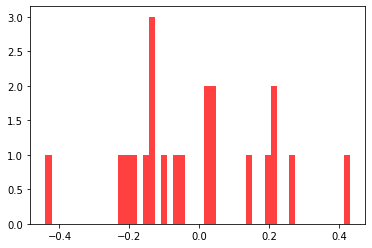

In [29]:
n, bins, patches = plt.hist(y-0.002000200020002*x, 50,  facecolor='red', alpha=0.75)

## Problem 3) Intro to Numerical Integration (10 Points)

To preview next week's lesson, lets play around with some basic numerical integration techniques. Consider the following function;

$$E(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x}e^{-t^{2}}dt.$$

The integral within this function can not be done analytically; i.e. it doesn't possess a nice functional solution like integrals encountered in the standard calculus course. Instead we will have to use numerical integration techniques to solve for it.

1) Code up a function for $E(x)$, you may use the basic trapizoidal integration solver below. Plot the function for values between $x=1$ and $x=100$.

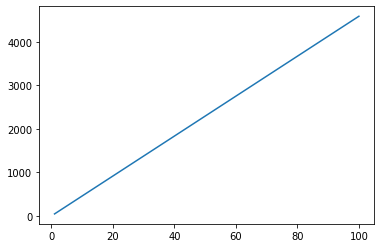

In [16]:
def trap_int(func, a, b, N=1000):
    """
    very simple trapezoidal integration solver
    """
    # bin width
    h = (b-a)/float(N)
    
    # get x-values
    x_range = np.linspace(a, b, N+1)
    
    # get y-values
    y_range = func(x_range)
    
    # evaluate trapezoidal sum
    I = h*(0.5*y_range[0] + 0.5*y_range[-1] + sum(y_range[1:-1]))
    return I
import math
def func1(t):
    return np.exp(-t**2)
def E(x):
    return 2/math.pi**0.5*trap_int(func1, 0, x, N=1000)
x=np.linspace(1,100,1000)
from matplotlib import pyplot as plt 
plt.plot(x,E(x))
plt.show()


2) What is the minimum number of slices (i.e. what value of $N$) is needed for the following accuracy?

$$E(0.5) = 0.52049987(7)$$
$$E(1.0) = 0.84270079(2)$$
$$E(1.5) =  0.96610514(6)$$

In [51]:
def trap_int(func, a, b, N):
    """
    very simple trapezoidal integration solver
    """
    # bin width
    h = (b-a)/float(N)
    
    # get x-values
    x_range = np.linspace(a, b, N+1)
    
    # get y-values
    y_range = func(x_range)
    
    # evaluate trapezoidal sum
    I = h*(0.5*y_range[0] + 0.5*y_range[-1] + sum(y_range[1:-1]))
    return I
import math
def func1(t):
    return np.exp(-t**2)
#minimum number of slices for E(0.5)
j=[]
for N in range(1000,15000):
    #using loop to find out the minimum number of slices
    def E(x):
        return 2/math.pi**0.5*trap_int(func1, 0, x, N)
    if E(0.5)-0.52049987<0.00000001 and E(0.5)-0.52049987>0:
        j.append(N)
def E(x):
        return 2/math.pi**0.5*trap_int(func1, 0, x, min(j))        
print("N="+str(min(j))+"  "+"E(0.5)="+str(E(0.5)))
#minimum number of slices for E(1.0)
j=[]
for N in range(1000,15000):
    #using loop to find out the minimum number of slices
    def E(x):
        return 2/math.pi**0.5*trap_int(func1, 0, x, N)
    if E(1.0)-0.84270079<0.00000001 and E(1.0)-0.84270079>0:
        j.append(N)
def E(x):
        return 2/math.pi**0.5*trap_int(func1, 0, x, min(j))        
print("N="+str(min(j))+"  "+"E(1.0)="+str(E(1.0)))
#minimum number of slices for E(1.5)
j=[]
for N in range(1000,15000):
    #using loop to find out the minimum number of slices
    def E(x):
        return 2/math.pi**0.5*trap_int(func1, 0, x, N)
    if E(1.5)-0.96610514<0.00000001 and E(1.5)-0.96610514>0:
        j.append(N)
def E(x):
        return 2/math.pi**0.5*trap_int(func1, 0, x, min(j))        
print("N="+str(min(j))+" "+"E(1.5)="+str(E(1.5)))
        

N=1531  E(0.5)=0.5204998700023485
N=4844  E(1.0)=0.8427007900012132
N=3215 E(1.5)=0.9661051400030938


## 4) Introduction to Numerical Simulation (15 Points)

Later on in the course we will learn more about running simulations of particles. In this excersise we will code up a very simple n-body simulation meant to show the formation of structure. We will assume the particles move only under gravitational interactions.

$$F_G = k m_1 m_2 /r^2$$

1) At early time it is thought that particles form at random positions and velocities from an underlying field. Generate 1,000 particles at random positions with random velocities in two dimensions. Assume a box size with units between 0 and 1. Have velocities be in each direction have a Gaussian distribution with mean 0 and standard deviation 0.01. Plot the field!

2) Write a function to calculate the force on each particle. Remember that force is a vector quanity.

3) Write a program with ten time steps where at each time step you calculate the force and displace the particles appropriately. Make both a scatterplot and 2d histogram of the resulting field.

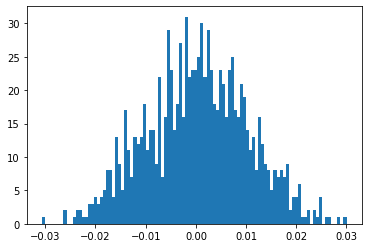

In [67]:
#distribution of velosity
mu, sigma = 0, 0.01 #standard deviation
v = mu + sigma*np.random.randn(1000) 
plt.hist(v,bins =100) 
plt.show()
#distribution of the direction of velositis
a=np.random.rand(1000)
b=np.random.rand(1000)
for i in range(0,1000):
    b[i]=(1-a[i]**2)**0.5


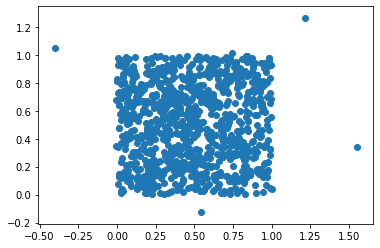

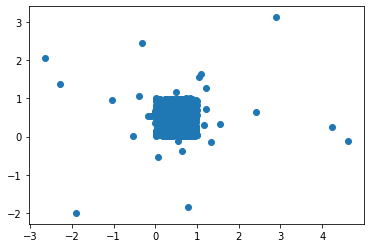

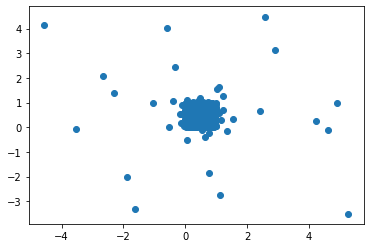

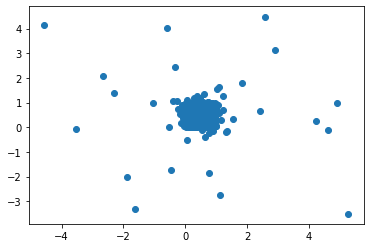

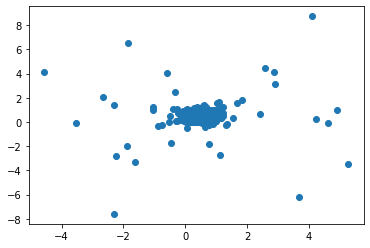

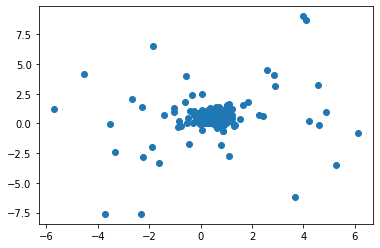

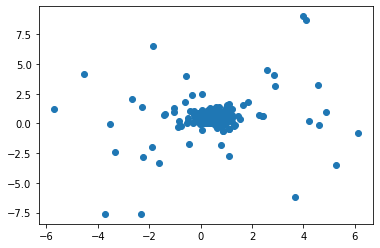

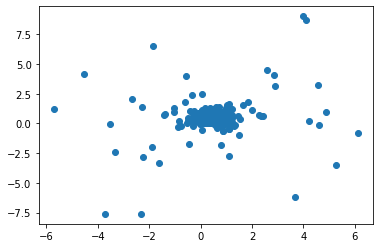

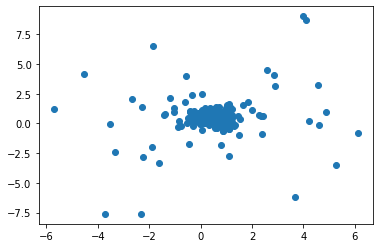

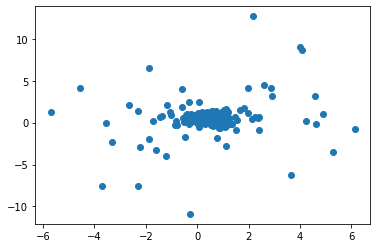

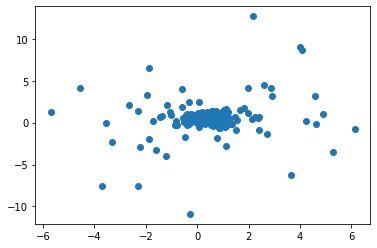

In [66]:
#2) Write a function to calculate the force on each particle. Remember that force is a vector quanity.
import numpy as np
x=np.random.rand(1000)
y=np.random.rand(1000)
def force(x,y,j):
    c=np.random.rand(1000)
    d=np.random.rand(1000)
    e=np.random.rand(1000)
    for i in range(0,1000):
        if i!=j:
            c[i]=((x[i]-x[j])**2+(y[i]-y[j])**2)**(-1)
            d[i]=c[i]*(x[i]-x[j])/((x[i]-x[j])**2+(y[i]-y[j])**2)**0.5
            e[i]=c[i]*(y[i]-y[j])/((x[i]-x[j])**2+(y[i]-y[j])**2)**0.5
    return sum(d),sum(e)
p=[]
for i in range(0,1000):
    p.append(force(x,y,i)[0])
q=[]
for i in range(0,1000):
    q.append(force(x,y,i)[1])
t=np.linspace(0,1,1100)
for j in range(0,11):
    p=[]
    for i in range(0,1000):
        p.append(force(x,y,i)[0])
    q=[]
    for i in range(0,1000):
        q.append(force(x,y,i)[1])
    x=np.array(x)+0.5*np.array(p)*(t[1]-t[0])**2
    y=np.array(y)+0.5*np.array(q)*(t[1]-t[0])**2
    plt.scatter(x, y)
    plt.show()
        

    

    
